### Importing necessary libraries

In [114]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader

### Creating a GPU device if available

In [115]:
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


### CNN Hyperparameters

In [116]:
image_base_size = 256
num_epochs = 2
batch_size = 64
learning_rate = 0.01

### Creating the dataset and loading in the monkeys

In [138]:


composed = transforms.Compose([
    transforms.Grayscale(),
    transforms.ConvertImageDtype(torch.float32),
    transforms.Resize([image_base_size, image_base_size])  # Square images idea for CNN

])

class MonkeyDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform):
        self.annotations_file = annotations_file
        self.img_dir = img_dir
        self.img_labels = pd.read_csv(annotations_file)
        self.transform = transform
        self.number_samples = 0

        # Adding all monkeys to a list
        self.monkeys = []
        for dirname, _, filenames in os.walk(self.img_dir):
            for filename in filenames:
                self.number_samples += 1
                self.monkeys.append((
                    os.path.join(dirname, filename),
                    filename
                ))

    def __getitem__(self, index):
        monkey_path, monkey_filename = self.monkeys[index]

        # Read monkey image from directory name
        monkey = read_image(monkey_path)

        # Get monkey label from filename
        label = monkey_filename[:2]  # Works since n0 to n9 all 2 characters
        
        # Apply the transforms:
        if self.transform:
            tmonkey = self.transform(monkey)
        
        return tmonkey, label

    def __len__(self):
        # This will allow len()
        return self.number_samples
    
    def get_label_map(self):
        print({i.strip():j.strip() for i, j in zip(self.img_labels.iloc[:, 0], self.img_labels.iloc[:, 2])})

    def get_label_map2(self):
        print({i.strip():j for i, j in zip(self.img_labels.iloc[:, 0], range(0, 10))})



# train_data = MonkeyDataset()
training_data = MonkeyDataset(
    annotations_file = "./kaggle/input/10-monkey-species/monkey_labels.txt",
    img_dir = "./kaggle/input/10-monkey-species/training/training",
    transform = composed
)
validation_data = MonkeyDataset(
    annotations_file = "./kaggle/input/10-monkey-species/monkey_labels.txt",
    img_dir = "./kaggle/input/10-monkey-species/validation/validation",
    transform = composed
)

training_data.get_label_map2()

{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}


### Testing dataloaders and showing example monkey

tensor([[[0.8717, 0.8706, 0.8698,  ..., 0.3724, 0.3495, 0.3319],
         [0.8845, 0.8701, 0.8629,  ..., 0.3705, 0.3509, 0.3350],
         [0.8706, 0.8706, 0.8666,  ..., 0.3764, 0.3604, 0.3396],
         ...,
         [0.0858, 0.0864, 0.1222,  ..., 0.1061, 0.1098, 0.1079],
         [0.0744, 0.0753, 0.0875,  ..., 0.1155, 0.1204, 0.1219],
         [0.0616, 0.0432, 0.0456,  ..., 0.1316, 0.1357, 0.1405]]]) ('n5', 'n4', 'n7', 'n0', 'n3', 'n1', 'n8', 'n9', 'n2', 'n3', 'n8', 'n1', 'n5', 'n5', 'n5', 'n8', 'n3', 'n7', 'n7', 'n1', 'n7', 'n4', 'n8', 'n2', 'n1', 'n0', 'n0', 'n9', 'n1', 'n7', 'n3', 'n3', 'n7', 'n6', 'n3', 'n6', 'n9', 'n1', 'n8', 'n0', 'n4', 'n6', 'n5', 'n4', 'n0', 'n1', 'n3', 'n6', 'n1', 'n4', 'n5', 'n9', 'n2', 'n8', 'n2', 'n7', 'n1', 'n7', 'n0', 'n8', 'n6', 'n4', 'n2', 'n0')


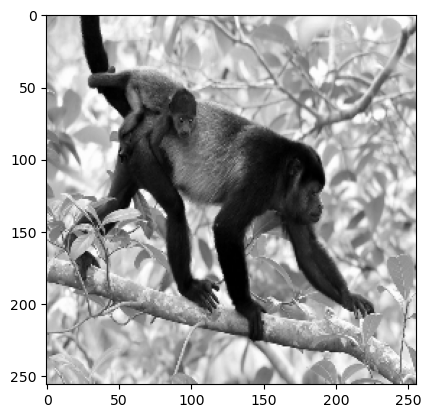

In [122]:
# dataloaders
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(validation_data, batch_size=batch_size, shuffle=True)

# iterating through the dataloader
train_features, train_labels = next(iter(train_dataloader))
print(train_features[0], train_labels)
plt.imshow(train_features[63][0], cmap="gray")
plt.show()

In [119]:
e = pd.read_csv("./kaggle/input/10-monkey-species/monkey_labels.txt")
e.iloc[:,3]

0    131
1    139
2    137
3    152
4    131
5    141
6    132
7    142
8    133
9    132
Name:  Train Images , dtype: int64